hgsdzfjuhde

# Installation des modules

In [25]:
#!pip install -r requirements.txt

# To do list:
- Stremlit interface
- Replacing missing values with the mean, median or mode of the column.
- Add something for the non numerical variables
- Using a more sophisticated imputation algorithm, such as KNN imputation or simple imputation.
- Users should be able to choose the method they want to use to handle missing values.
- The Z-score standardization, which resizes the data to have a mean of 0 and a standard deviation of 1.
- Other normalization methods
- Users will need to be able to choose the normalization method they want to use.
- Clustering DB-SCAN
- Prediction
- Cluster statistics
- The demo video

Imports

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [27]:

file_name ="test.csv"
df =  pd.read_csv(file_name)
#df.head()

# Part I: Initial Data Exploration

<span style='color:Red'>Ajouter un truc pour gérer les variables catégorielles</span>

In [28]:
for i in df.columns:
    print(f'{i} is a ',df[f'{i}'].dtype)

A is a  int64
B is a  float64
C is a  float64
D is a  object


In [29]:
count_nan=df.isna().sum()
print(f"Il y'a {len(df.columns)} colonnes ({[i for i in df.columns]}) et {len(df)} lignes dans le fichier {file_name},\nLes NAN par colonnes sont: \n{count_nan}")
print ('Voilà la description plus précise des différentes colonnes du fichier :')
df.describe()

Il y'a 4 colonnes (['A', 'B', 'C', 'D']) et 76 lignes dans le fichier test.csv,
Les NAN par colonnes sont: 
A     0
B     0
C    38
D     1
dtype: int64
Voilà la description plus précise des différentes colonnes du fichier :


,A,B,C
count,76.000000,76.000000,38.000000
mean,50.052632,-0.291194,39.500000
std,28.444048,0.894194,22.226111
min,1.000000,-1.913280,2.500000
25%,26.500000,-0.908024,21.000000
50%,52.500000,-0.377556,39.500000
75%,73.500000,0.260034,58.000000
max,99.000000,1.579213,76.500000


# Part II: Data Pre-processing and Cleaning

- Deleting columns with missing values: 

In [30]:
delete_c=False
if delete_c:
    for i in df.columns:
        if count_nan[i] != 0:
            df.drop([i], axis=1, inplace=True)
    #print ('nombre de nan :'count_nan)

- Supprimer les missing values:

In [31]:
df = df.dropna()
# print ('nombre de nan :'count_nan)

<span style='color:Red'>Il manque la méthode  KNN imputation or simple imputation </span>
</br>
<span style='color:Red'>Replacing missing values with the mean, median or mode of the column.</span>

# Normalisation
* <span style='color:Red'>Il manque encore:</span>
* <span style='color:Red'>The Z-score standardization, which resizes the data to have a mean of 0 and a standard
deviation of 1.</span>
* <span style='color:Red'>Other normalization methods</span>

In [32]:
scaler =MinMaxScaler()


In [33]:
numerical_columns = []
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == float:
        numerical_columns.append(i)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [34]:
df

,A,B,C,D
1,0.989247,0.414475,0.000000,Z
3,0.763441,0.000000,0.027027,Z
5,0.215054,0.386828,0.054054,Y
7,0.924731,0.637804,0.081081,Y
9,0.795699,0.143444,0.108108,Y
11,0.247312,0.483180,0.135135,Y
13,0.225806,0.139881,0.162162,Y
17,0.311828,0.655400,0.216216,Y
19,0.010753,0.464306,0.243243,Y
20,0.000000,0.733278,0.270270,X


# Part III: Visualization of the cleaned data

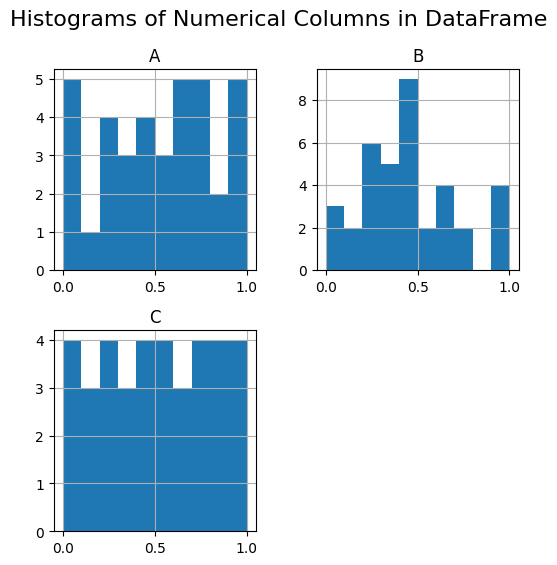

In [35]:
df.hist(bins=10,figsize=(6, 6), grid=True)
plt.suptitle('Histograms of Numerical Columns in DataFrame', fontsize=16)
plt.show()

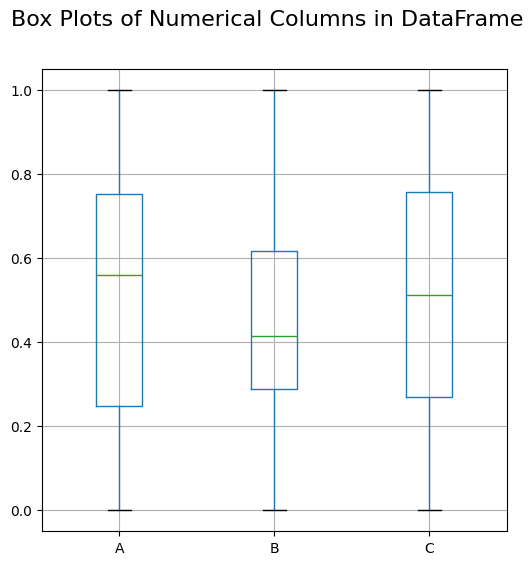

In [36]:
df.boxplot(column=numerical_columns, figsize=(6, 6))
plt.suptitle('Box Plots of Numerical Columns in DataFrame', fontsize=16)
plt.show()

# Part IV: Clustering or prediction

## Clustering

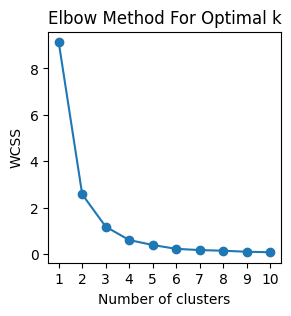

In [37]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_columns].values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(3, 3))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()

<span style='color:Red'>DB-SCAN</span>

## <span style='color:Red'>Prediction</span>

# Part V: Learning Evaluation


2D

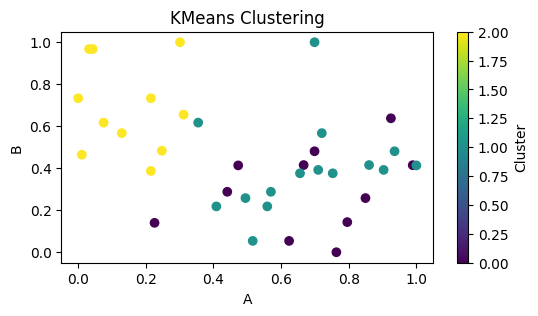

In [40]:

chosen_params = ['A','B']
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

plt.figure(figsize=(6, 3))
plt.scatter(df[chosen_params[0]], df[chosen_params[1]], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('A')
plt.ylabel('B')
plt.colorbar(label='Cluster')
plt.show()

3D

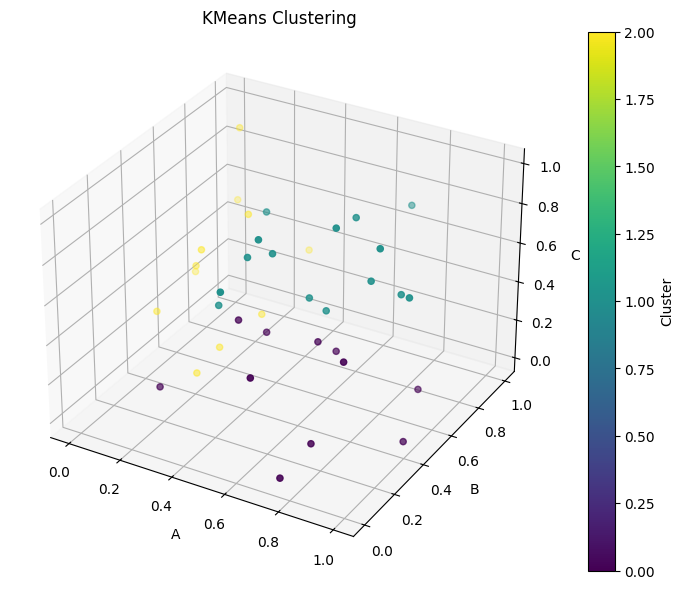

In [41]:
chosen_params = ['A','B','C']
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

# Plot the clusters using a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(df[chosen_params[0]], df[chosen_params[1]], df[chosen_params[2]], 
                     c=df['Cluster'], cmap='viridis', marker='o')

# Title and labels
ax.set_title('KMeans Clustering')
ax.set_xlabel(chosen_params[0])
ax.set_ylabel(chosen_params[1])
ax.set_zlabel(chosen_params[2])

# Color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

# Show plot
plt.show()

<span style='color:Red'>Cluster statistics:
</br>mode prediction
</span>